In [1]:
### User Interface

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
#line colors: obtenidos a partir del mapa
lc_A = (0,174,224)  #azul clarito
lc_B = (230,54,41) #rojo
lc_C = (18,102,175) #azul oscuro
lc_D = (2,122,97) #verde oscuro
lc_E = (124,38,129) #morado fuerte
lines_colors = [lc_A, lc_B, lc_C, lc_D, lc_E]
lines_l = ['A','B','C','D','E']
lines_names = ['LINEA '+l for l in lines_l]
dict_lines_colors = dict(zip(lines_names,lines_colors))
def f_lines_colors(color):
    return dict_lines_colors[color]

In [7]:
lines_data = gpd.read_file('Downloads/lineas-de-subte-zip/lineas-subte.shp')
lines_data = lines_data[np.isin(lines_data.LINEASUB, lines_names)].reset_index(drop=True).drop(columns=['ID'])

In [8]:
lines_data

,LINEASUB,geometry
0,LINEA D,"LINESTRING (-58.45213 -34.56622, -58.45163 -34..."
1,LINEA D,"LINESTRING (-58.45649 -34.56231, -58.45528 -34..."
2,LINEA D,"LINESTRING (-58.44467 -34.57001, -58.44252 -34..."
3,LINEA D,"LINESTRING (-58.43501 -34.57518, -58.43423 -34..."
4,LINEA D,"LINESTRING (-58.42571 -34.57842, -58.42539 -34..."
...,...,...
66,LINEA B,"LINESTRING (-58.47424 -34.58125, -58.47500 -34..."
67,LINEA B,"LINESTRING (-58.48101 -34.57780, -58.48140 -34..."
68,LINEA A,"LINESTRING (-58.45671 -34.62667, -58.45784 -34..."
69,LINEA A,"LINESTRING (-58.46354 -34.62909, -58.46411 -34..."


In [9]:
lines_colors = np.array(list(map(f_lines_colors, lines_data.LINEASUB)))/255

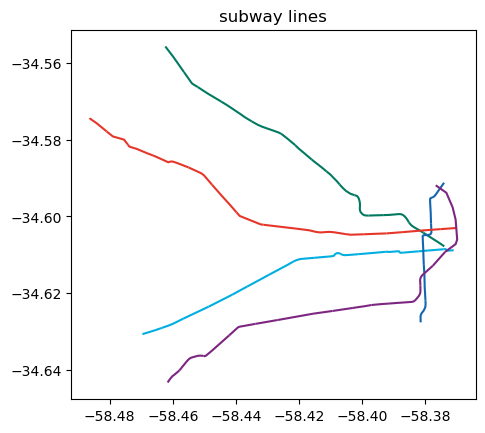

In [10]:
lines_data.plot(color = lines_colors, legend = True)
plt.title('subway lines')
plt.show()

In [11]:
stations_data = gpd.read_file('Downloads/estaciones-de-subte/estaciones-de-subte.shp')
stations_data = stations_data[np.isin(stations_data.LINEA, lines_l)].reset_index(drop=True).drop(columns=['ID'])

In [12]:
stations_data

,ESTACION,LINEA,geometry
0,9 DE JULIO,D,POINT (-58.38057 -34.60425)
1,FACULTAD DE MEDICINA,D,POINT (-58.39792 -34.59976)
2,TRIBUNALES - TEATRO COLÓN,D,POINT (-58.38514 -34.60159)
3,AGÜERO,D,POINT (-58.40716 -34.59163)
4,R.SCALABRINI ORTIZ,D,POINT (-58.41596 -34.58516)
...,...,...,...
73,SAN PEDRITO,A,POINT (-58.46964 -34.63071)
74,SAN JOSÉ DE FLORES,A,POINT (-58.46354 -34.62909)
75,RETIRO,E,POINT (-58.37585 -34.59211)
76,CATALINAS,E,POINT (-58.37170 -34.59660)


In [13]:
stations_colors = np.array(list(map(f_lines_colors, 'LINEA '+stations_data.LINEA)))/255

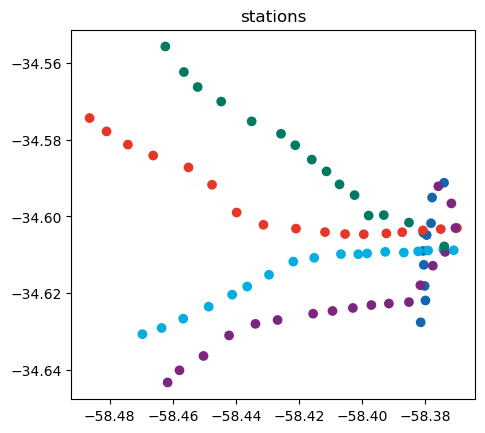

In [14]:
stations_data.plot(color = stations_colors)
plt.title('stations')
plt.show()

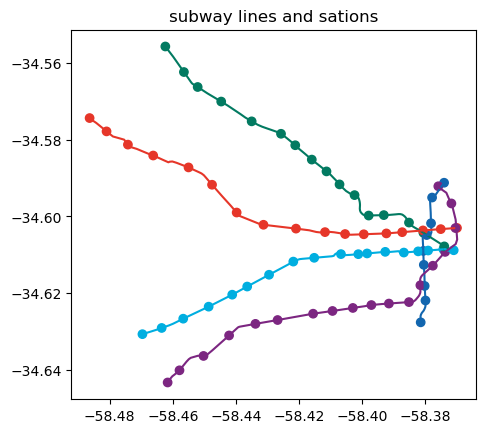

In [15]:
fig, ax = plt.subplots()
lines_data.plot(color = lines_colors, ax = ax)
stations_data.plot(color = stations_colors, ax = ax)
plt.title('subway lines and sations')
plt.show()

In [16]:
boundaries_margin = 0.0008
# station_colors_ = stations_colors
#the most bottom station:
bottom_sname = 'CONSTITUCION'
# print('bottom')
# display(stations_data[stations_data.ESTACION==bottom_sname])
bottom_y = stations_data[stations_data.ESTACION==bottom_sname].iloc[0,:]['geometry'].y  - boundaries_margin
#the rightest station:
right_sname = 'LEANDRO N. ALEM'
# print('right')
# display(stations_data[stations_data.ESTACION==right_sname])
right_x = stations_data[stations_data.ESTACION==right_sname].iloc[0,:]['geometry'].x + boundaries_margin
#the toppest station:
top_sname = 'RETIRO'
# print('top')
# display(stations_data[stations_data.ESTACION==top_sname])
top_y = stations_data[stations_data.ESTACION==top_sname].iloc[0,:]['geometry'].y  + boundaries_margin
#the leftest station:
left_sname = 'PASTEUR - AMIA'
# print('left')
# display(stations_data[stations_data.ESTACION==left_sname])
left_x = stations_data[stations_data.ESTACION==left_sname].iloc[0,:]['geometry'].x - boundaries_margin

In [17]:
lines_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
stations_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
from shapely import Polygon

In [20]:
def rectangle_cords(x,X,y,Y):
    return ((x,y),(X,y),(X,Y),(x,Y),(x,y))

In [21]:
cords = rectangle_cords(left_x, right_x, bottom_y, top_y)
rosa = (255,64,255)
boundaries_color = np.array([rosa])/255
boundaries = gpd.GeoDataFrame(geometry = [Polygon(cords)], crs = 'EPSG:4326')

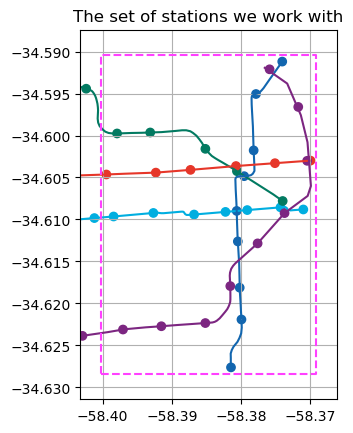

In [22]:
fig, ax = plt.subplots()
plot_margin = 0.003
y_lim = (bottom_y-plot_margin,top_y+plot_margin)
x_lim = (left_x-plot_margin, right_x+plot_margin)
plt.ylim(y_lim)
plt.xlim(x_lim)
lines_data.plot(color = lines_colors, ax = ax)
stations_data.plot(color = stations_colors, ax = ax)
boundaries.boundary.plot(color = boundaries_color, ls = '--', ax = ax)
plt.title('The set of stations we work with')
plt.grid(True)
plt.show()

In [23]:
view_lim_cords = rectangle_cords(*(x_lim+y_lim))
view_lim = gpd.GeoDataFrame(geometry = [Polygon(view_lim_cords)], crs = 'EPSG:4326')

In [24]:
stations_data_set = stations_data[stations_data.geometry.within(boundaries.loc[0,'geometry'])]
lines_data_set = gpd.overlay(lines_data,view_lim, how='intersection')

In [25]:
lines_colors_set = np.array(list(map(f_lines_colors, lines_data_set.LINEASUB)))/255
stations_colors_set = np.array(list(map(f_lines_colors, 'LINEA '+stations_data_set.LINEA)))/255

In [26]:
import mplleaflet

###  Importante aplicar cambios para que funcione:
meterte en en mplleaflet\mplexporter\exporter.py que en mi caso está en:
C:\Users\prestamo_admin\anaconda3\Lib\site-packages\mplleaflet\mplexporter\exporter.py
y cambiar 'collection.get_offset_position()' por '"screen"'

meterte en mplleaflet\mplexporter\utils.py que en mi caso esta en:
C:\Users\prestamo_admin\anaconda3\Lib\site-packages\mplleaflet\mplexporter\utils.py
y cambiar *'axis._gridOnMajor'* por 'axis._major_tick_kw['gridOn']'

### Cambio no necesario pero que evita warning:
meterte en mplleaflet\_display.py que en mi caso esta en:
C:\Users\prestamo_admin\anaconda3\Lib\site-packages\mplleaflet\_display.py
En la función display hay que hacer unos cambios:
- cambiar 'HTML' por 'IFrame' en las 2 apariciones 
- además cambiar el contenido la variable iframe_html en la funcion display
  debe quedar así: iframe_html = {'src':"data:text/html;base64,{html}".format(html = base64.b64encode(html.encode('utf8')).decode('utf8')), 'width':'100%', 'height':int(60.*fig.get_figheight())}
- por último cambiar el return de la funcion: return IFrame(**iframe_html)

In [30]:
fig, ax = plt.subplots()
plt.ylim(y_lim)
plt.xlim(x_lim)
lines_data_set.plot(color = lines_colors_set, ax = ax,)
stations_data_set.plot(color = stations_colors_set, ax = ax)
plt.title('subway lines and sations sets')
# mplleaflet.show()
mplleaflet.display(fig=ax.figure)#, crs=lines_data_set.crs)

In [40]:
fig, ax = plt.subplots(figsize = (1,5))
plt.ylim(y_lim)
plt.xlim(x_lim)
lines_data.plot(color = lines_colors, ax = ax,)
stations_data.plot(color = stations_colors, ax = ax)
boundaries.boundary.plot(color = boundaries_color, ax = ax, ls = '--')
plt.title('subway lines and sations')
# mplleaflet.show()
mplleaflet.display(fig=ax.figure)#, crs=lines_data_set.crs)
# mplleaflet.save_html(fig=ax.figure, fileobj = 'stations_and_lines_map.html')